In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import auc

In [ ]:
#Loading the Dataset
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("Shape:", diabetes_df.shape)
diabetes_df.info()

Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes_df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


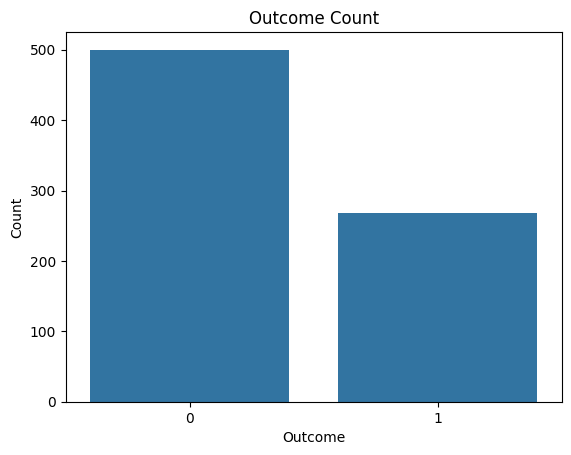

In [ ]:
# Exploratory Data Analysis (EDA)
sns.countplot(x="Outcome", data=diabetes_df)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Outcome Count")
plt.show()

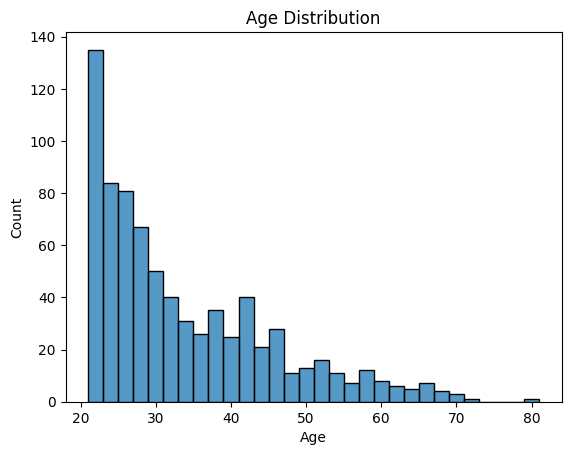

In [ ]:
sns.histplot(diabetes_df['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

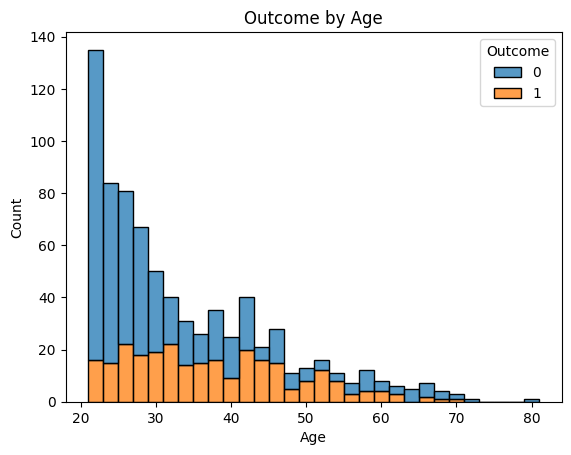

In [ ]:
sns.histplot(data=diabetes_df, x='Age', hue='Outcome', multiple='stack', bins=30)
plt.title('Outcome by Age')
plt.show()

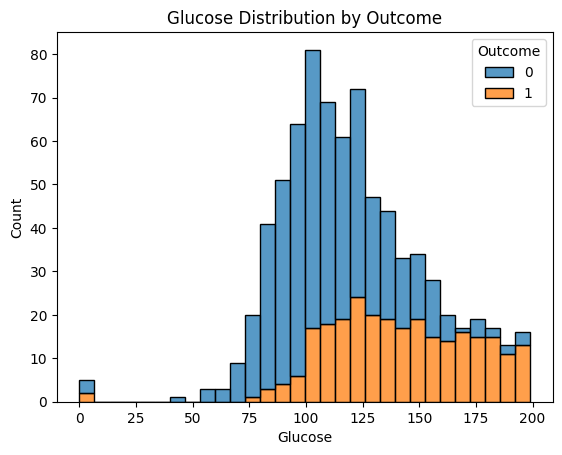

In [ ]:
sns.histplot(data=diabetes_df, x='Glucose', hue='Outcome', multiple='stack', bins=30)
plt.title('Glucose Distribution by Outcome')
plt.show()

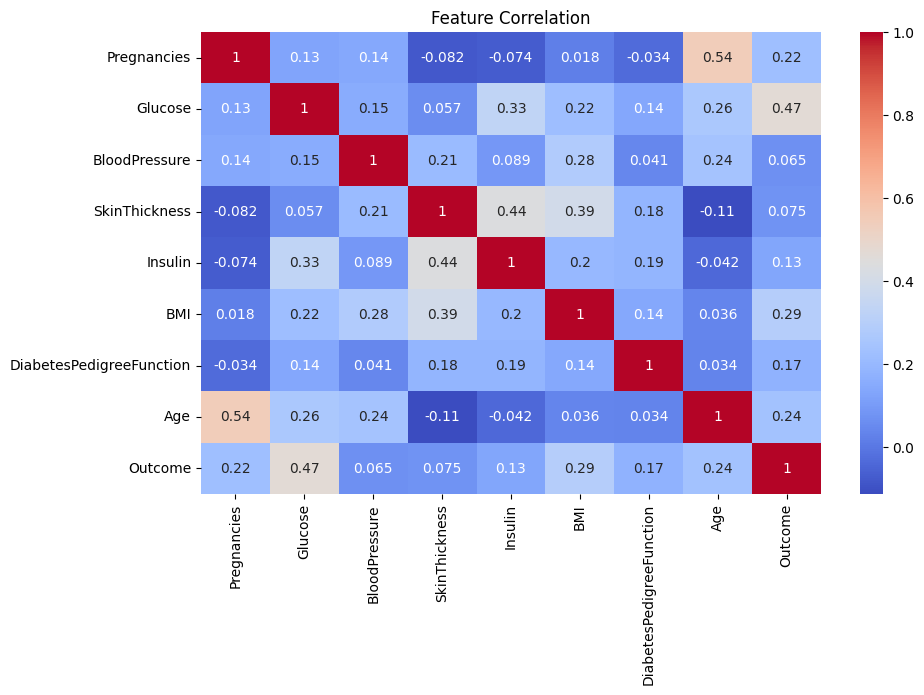

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [ ]:
# Feature Scaling
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled Training Data:")
display(X_train_scaled.head())

print("\nScaled Test Data:")
display(X_test_scaled.head())

Scaled Training Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095



Scaled Test Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
324,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
624,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
690,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
473,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101


In [ ]:
print("Training Data Shape:", X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)

Training Data Shape: (614, 8)
Testing Data Shape: (154, 8)


**Logistic Regression**

In [ ]:
model_log = LogisticRegression(max_iter=200)
model_log.fit(X_train_scaled, y_train)
pred_log = model_log.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_log))

Accuracy: 0.7532467532467533


Evaluation By
* Confusion Matrix

* Precision, Recall, F1-score

* ROC Curve & AUC

* Split data into train/test

* Applied feature scaling where needed

* Used plots to visualize performance

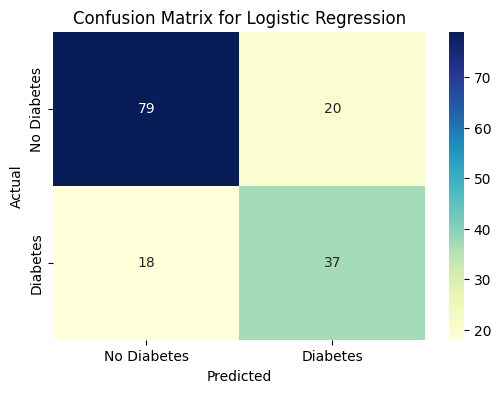

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Precision, Recall, F1-Score
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, pred_log))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



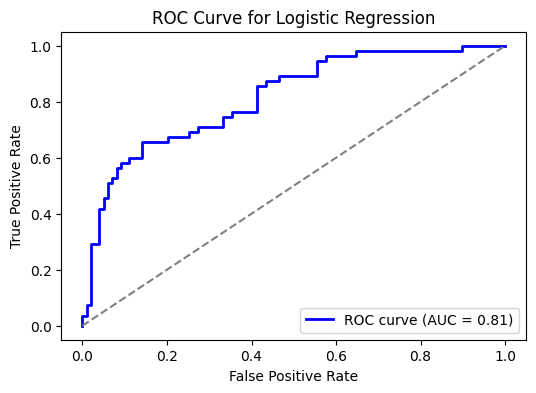

In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model_log.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

**K-Nearest Neighbors (KNN)**

Accuracy: 0.6818181818181818


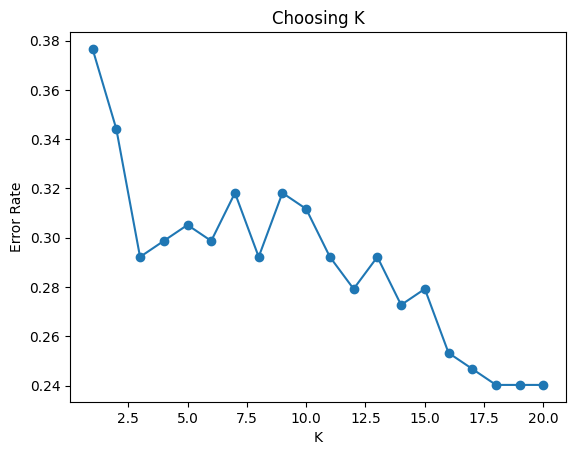

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train_scaled, y_train)
pred_knn = model_knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_knn))

# Choosing the right K
errors = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

Evaluation By
* Confusion Matrix

* Precision, Recall, F1-score

* ROC Curve & AUC

* Split data into train/test

* Applied feature scaling where needed

* Used plots to visualize performance

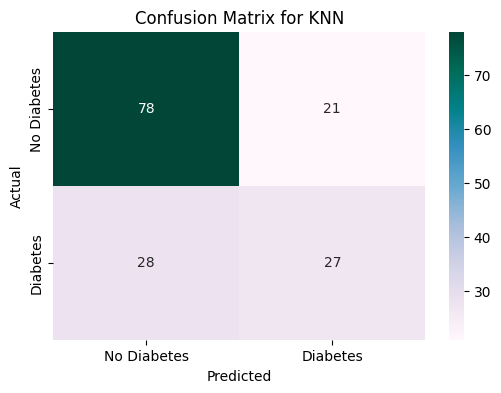

In [ ]:
#Confusion Matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='PuBuGn', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Precision, Recall, F1-Score
print("Classification Report for KNN:")
print(classification_report(y_test, pred_knn))

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.56      0.49      0.52        55

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154



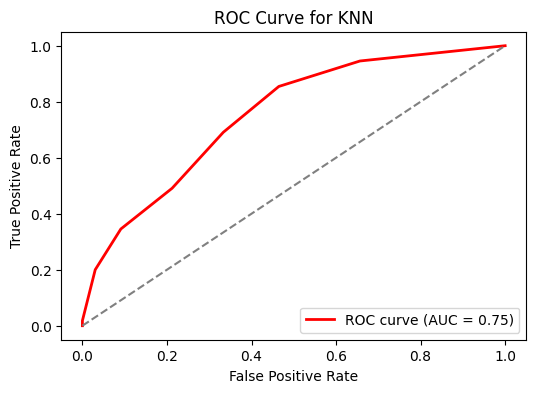

In [ ]:
#ROC Curve and AUC for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, model_knn.predict_proba(X_test_scaled)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, color='Red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

**Decision Trees**

Accuracy: 0.6948051948051948


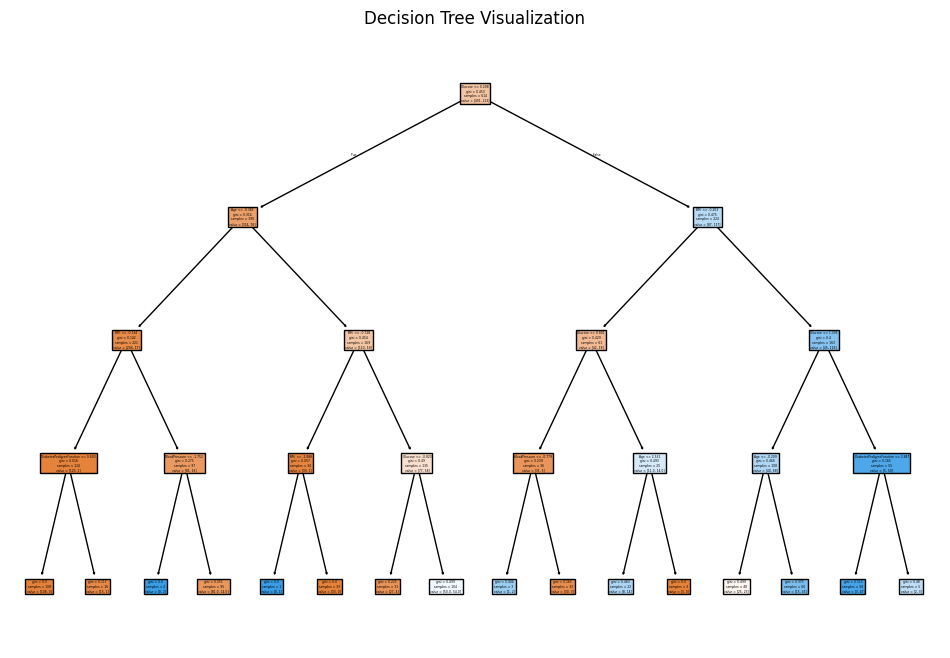

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_train_scaled, y_train)
pred_tree = model_tree.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_tree))

# Visualize the trained decision tree
plt.figure(figsize=(12, 8))
plot_tree(model_tree, filled=True, feature_names=X.columns)
plt.title('Decision Tree Visualization')
plt.show()


Evaluation By
* Confusion Matrix

* Precision, Recall, F1-score

* ROC Curve & AUC

* Split data into train/test

* Applied feature scaling where needed

* Used plots to visualize performance

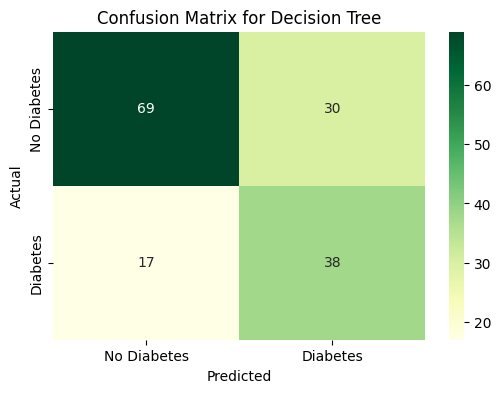

In [ ]:
# Confusion Matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='YlGn', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#Precision, Recall, F1-Score
print("Classification Report for Decision Trees:")
print(classification_report(y_test, pred_tree))


Classification Report for Decision Trees:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.56      0.69      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.69      0.70       154



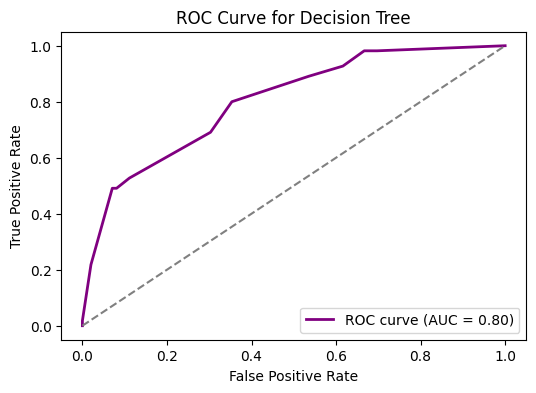

In [ ]:
# ROC Curve and AUC for Decision Tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, model_tree.predict_proba(X_test_scaled)[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(6, 4))
plt.plot(fpr_tree, tpr_tree, color='Purple', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


**Random Forest Classifier**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
pred_rf = model_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_rf))

Accuracy: 0.7207792207792207


Evaluation By
* Confusion Matrix

* Precision, Recall, F1-score

* ROC Curve & AUC

* Split data into train/test

* Applied feature scaling where needed

* Used plots to visualize performance

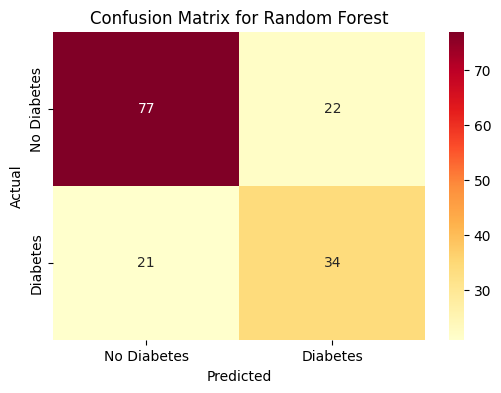

In [ ]:
# Confusion matrix for Random Forest Classifier
conf_matrix_rf = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='YlOrRd', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Precision, Recall, F1-Score
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, pred_rf))


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



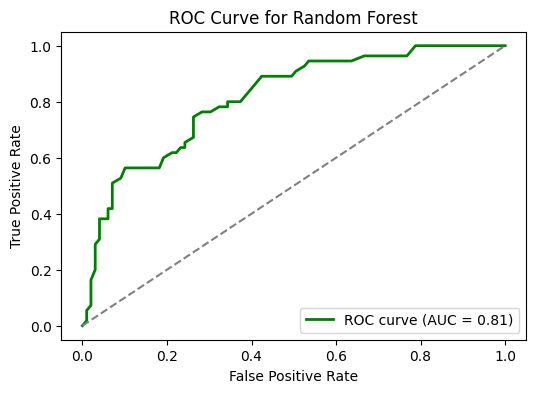

In [ ]:
#ROC curve and AUC for Random Forest Classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, model_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Classifier model Comparison
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, pred_log),
              accuracy_score(y_test, pred_knn),
              accuracy_score(y_test, pred_tree),
              accuracy_score(y_test, pred_rf)]

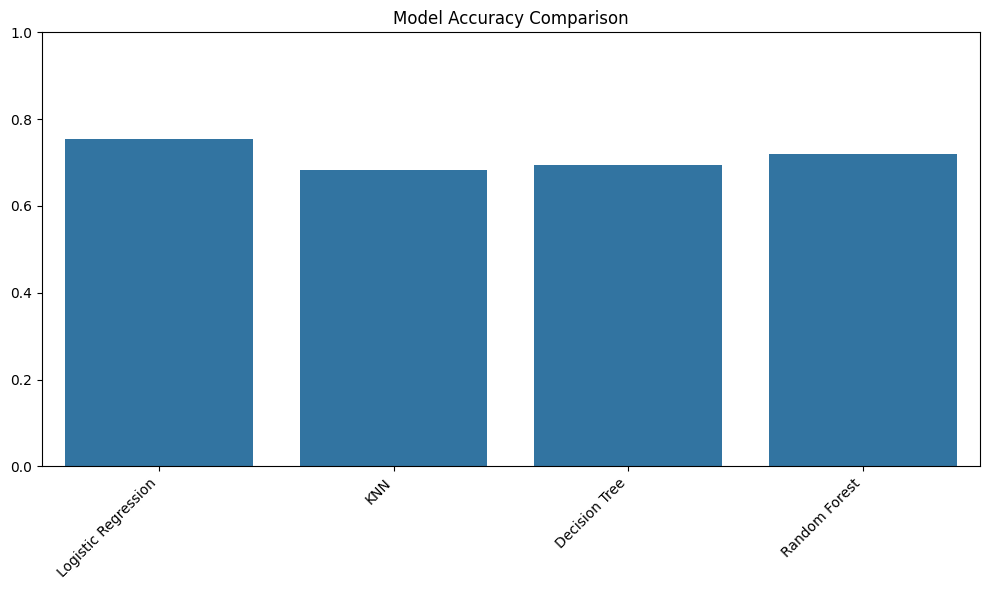

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()